In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

### Composing Networks

In [3]:
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y

In [4]:
# # Plot two shallow neural networks and the composition of the two
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('Net 2 input'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Net 1 Input'); ax.set_ylabel('Net 2 Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

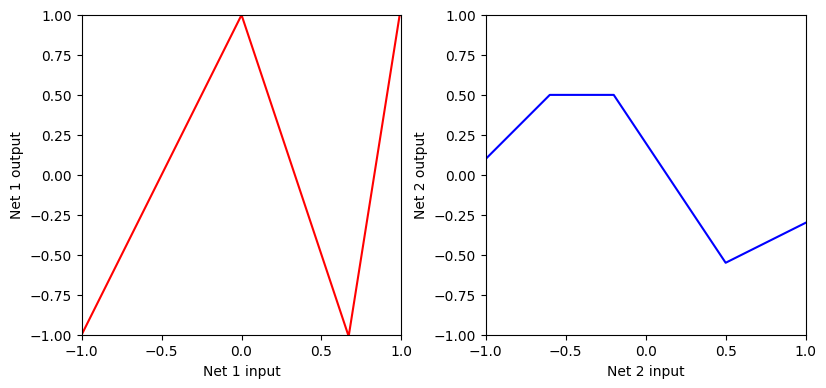

In [5]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Display the two inputs
x = np.arange(-1,1,0.001)
# We run the first  and second neural networks for each of these input values
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plot both graphs
plot_neural_two_components(x, net1_out, net2_out)

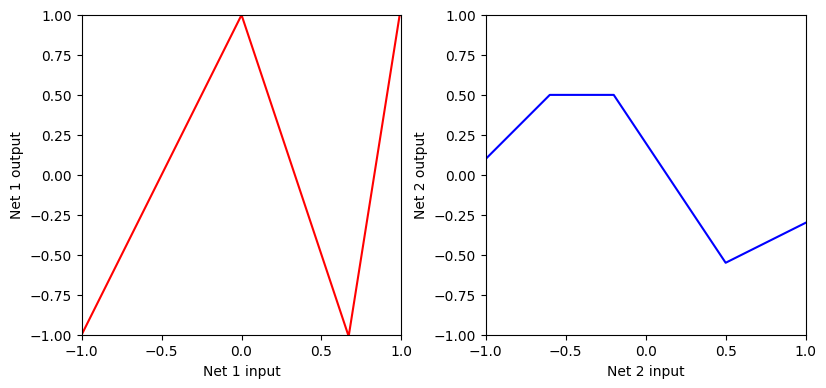

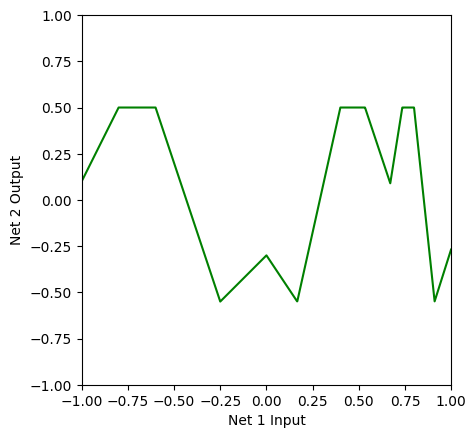

In [6]:
# feed the output of first network into second network (replace this line)
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

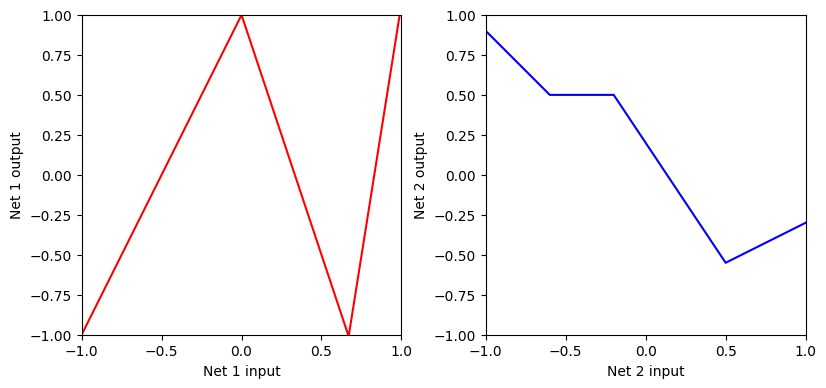

In [7]:
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

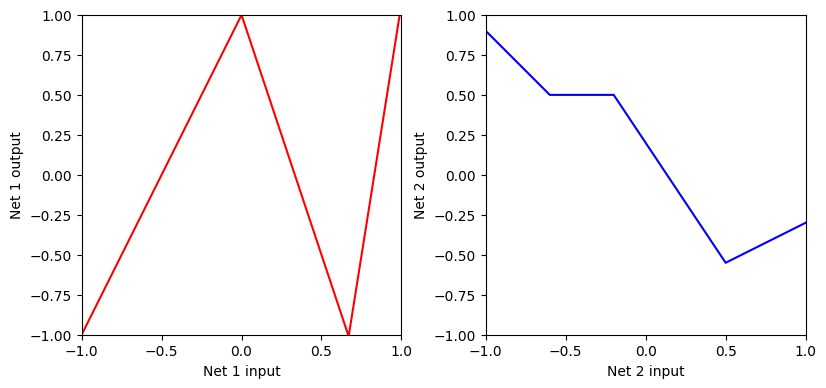

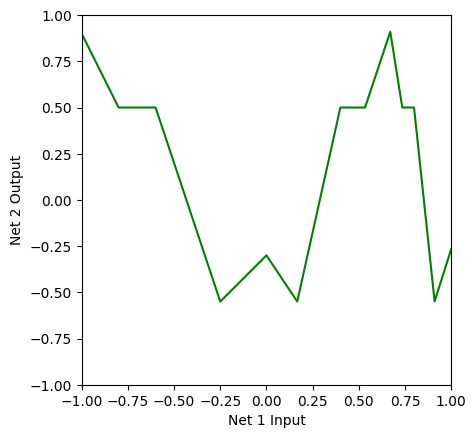

In [8]:
# Now we'll change things a up a bit.  What happens if we change the second network? (note the *-1 change)

net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

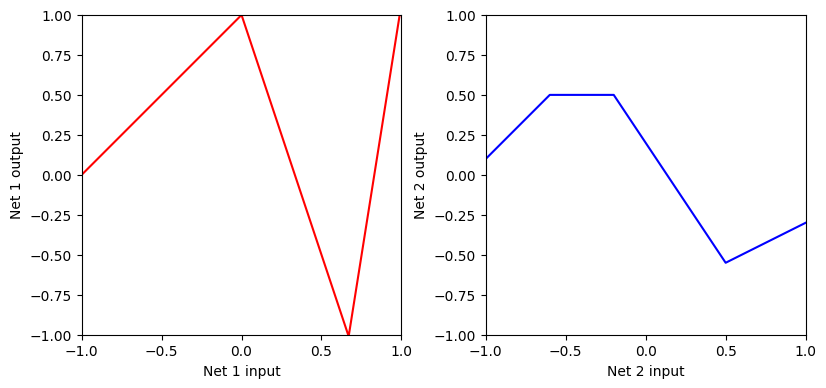

In [9]:

# Let's change things again.  What happens if we change the first network? (note the changes)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1*0.5, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

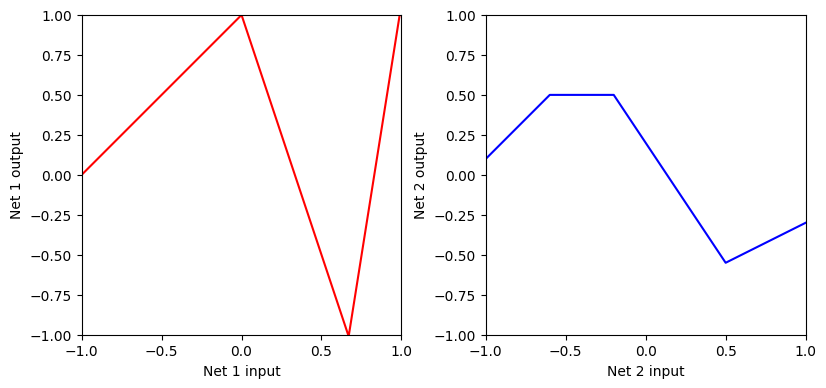

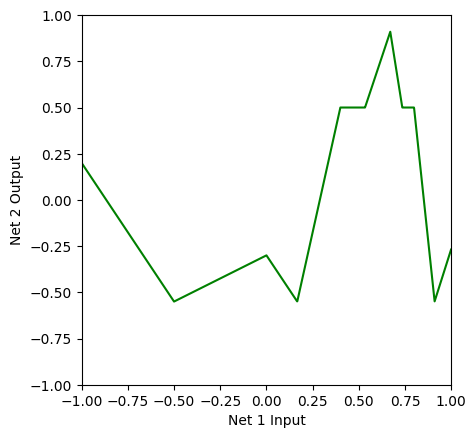

In [10]:
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

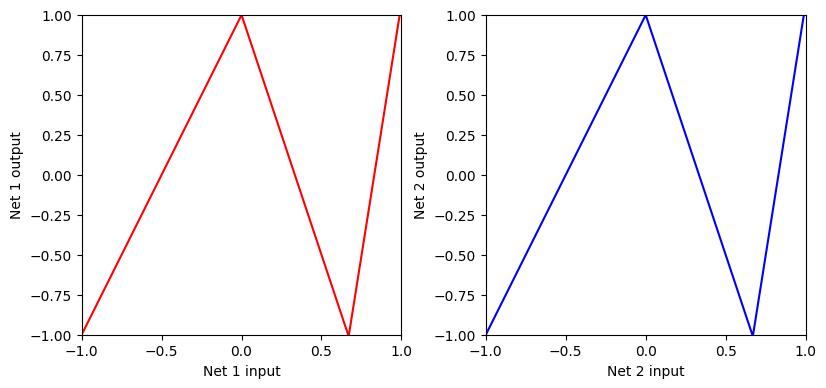

In [12]:
# Let's change things again.  What happens if the first network and second networks are the same?
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new)

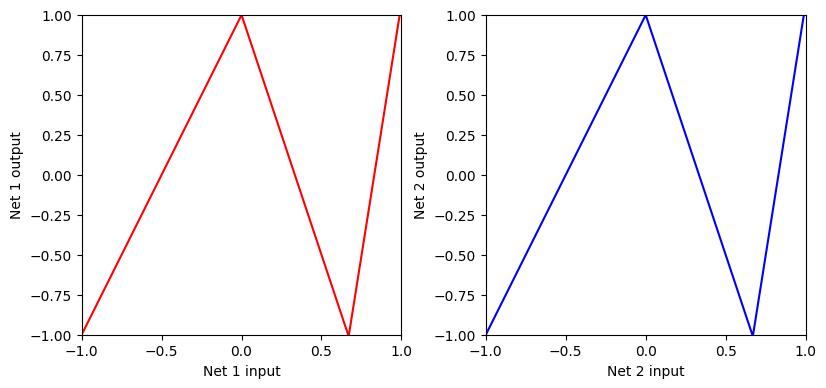

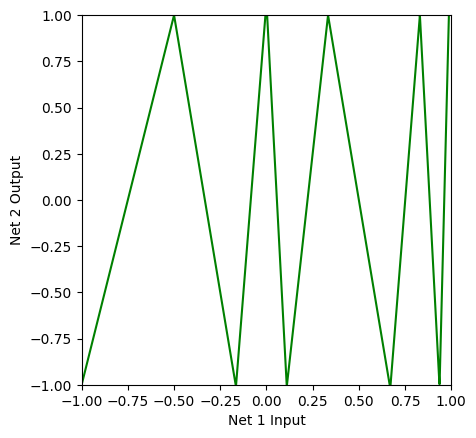

In [13]:
net12_out = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)

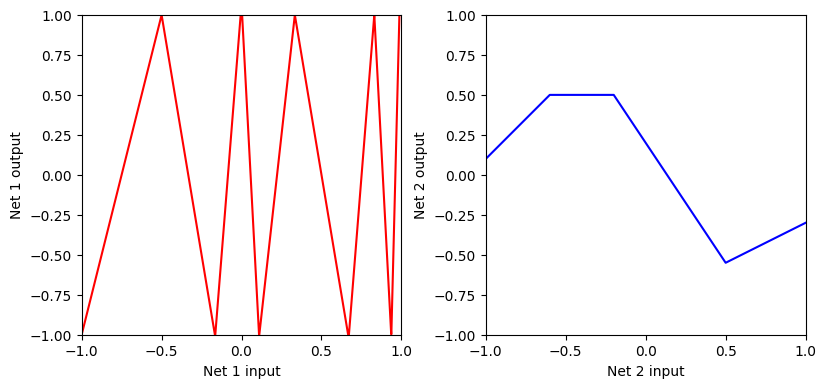

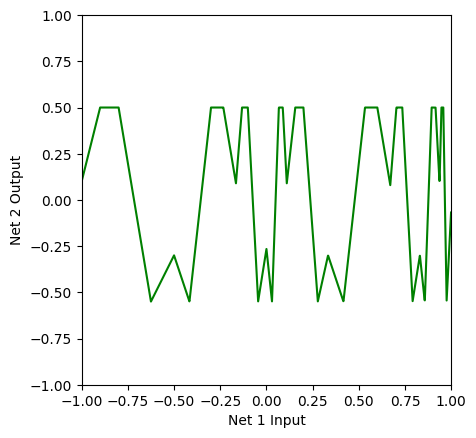

In [14]:
# Contemplate what you think will happen when we feed the
# output of the original first network into a second copy of the original first network, and then
# the output of that into the original second network (so now we have a three layer network)
# How many total linear regions will we have in the output?
net123_out = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net12_out, net2_out, net123_out)

### Clipping functions

In [15]:
# Define a deep neural network with, one input, one output, two hidden layers and three hidden units (eqns 4.7-4.9)
# To make this easier, we store the parameters in ndarrays, so phi_0 = phi[0] and psi_3,3 = psi[3,3] etc.
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):

  # Preactivations at layer 1 (terms in brackets in equation 4.7)
  layer1_pre_1 = theta[1, 0] + theta[1,1] * x
  layer1_pre_2 = theta[2, 0] + theta[2,1] * x
  layer1_pre_3 = theta[3, 0] + theta[3,1] * x

  # Activation functions (rest of equation 4.7)
  h1 = activation_fn(layer1_pre_1)
  h2 = activation_fn(layer1_pre_2)
  h3 = activation_fn(layer1_pre_3)

  # Preactivations at layer 2 (terms in brackets in equation 4.8)
  layer2_pre_1 = psi[1,0] + psi[1, 1] * h1 + psi[1, 2] * h2 + psi[1, 3] * h3
  layer2_pre_2 = psi[2,0] + psi[2, 1] * h1 + psi[2, 2] * h2 + psi[2, 3] * h3
  layer2_pre_3 = psi[3,0] + psi[3, 1] * h1 + psi[3, 2] * h2 + psi[3, 3] * h3

  # Activation functions (rest of equation 4.8)
  h1_prime = activation_fn(layer2_pre_1)
  h2_prime = activation_fn(layer2_pre_2)
  h3_prime = activation_fn(layer2_pre_3)

  # Weighted outputs by phi (three last terms of equation 4.9)
  phi1_h1_prime = phi[1] * h1_prime
  phi2_h2_prime = phi[2] * h2_prime
  phi3_h3_prime = phi[3] * h3_prime

  # Combine weighted activation and add y offset (summing terms of equation 4.9)
  y = phi[0] + phi1_h1_prime + phi2_h2_prime + phi3_h3_prime


  # Return everything we have calculated
  return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime

In [16]:
def plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime):

    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,layer2_pre_1,'r-'); ax[0,0].set_ylabel('$\psi_{10}+\psi_{11}h_{1}+\psi_{12}h_{2}+\psi_{13}h_3$')
    ax[0,1].plot(x,layer2_pre_2,'b-'); ax[0,1].set_ylabel('$\psi_{20}+\psi_{21}h_{1}+\psi_{22}h_{2}+\psi_{23}h_3$')
    ax[0,2].plot(x,layer2_pre_3,'g-'); ax[0,2].set_ylabel('$\psi_{30}+\psi_{31}h_{1}+\psi_{32}h_{2}+\psi_{33}h_3$')
    ax[1,0].plot(x,h1_prime,'r-'); ax[1,0].set_ylabel("$h_{1}^{'}$")
    ax[1,1].plot(x,h2_prime,'b-'); ax[1,1].set_ylabel("$h_{2}^{'}$")
    ax[1,2].plot(x,h3_prime,'g-'); ax[1,2].set_ylabel("$h_{3}^{'}$")
    ax[2,0].plot(x,phi1_h1_prime,'r-'); ax[2,0].set_ylabel("$\phi_1 h_{1}^{'}$")
    ax[2,1].plot(x,phi2_h2_prime,'b-'); ax[2,1].set_ylabel("$\phi_2 h_{2}^{'}$")
    ax[2,2].plot(x,phi3_h3_prime,'g-'); ax[2,2].set_ylabel("$\phi_3 h_{3}^{'}$")

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    plt.show()

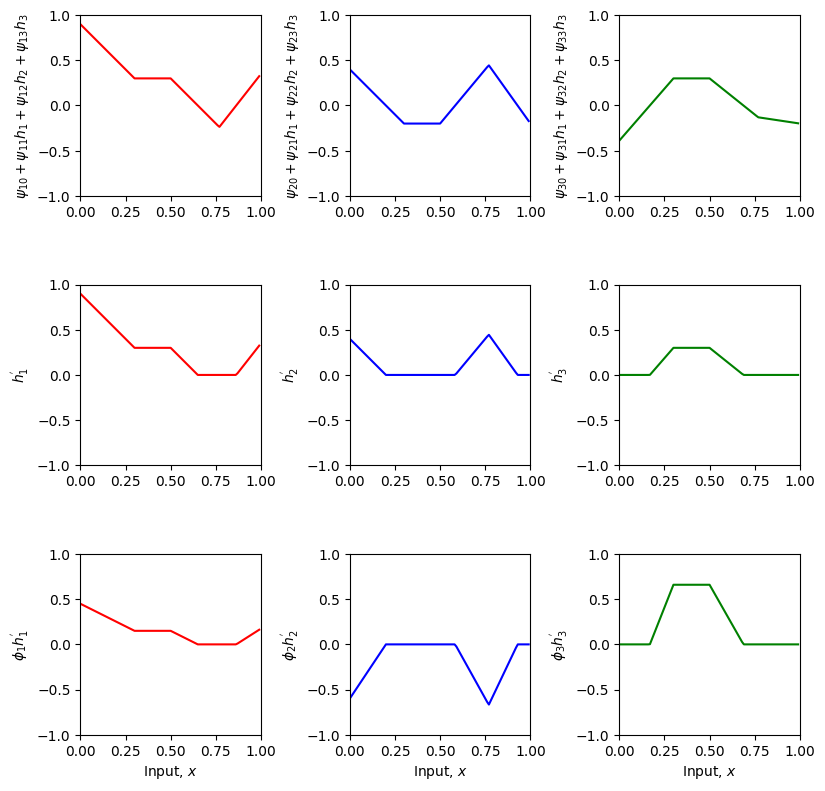

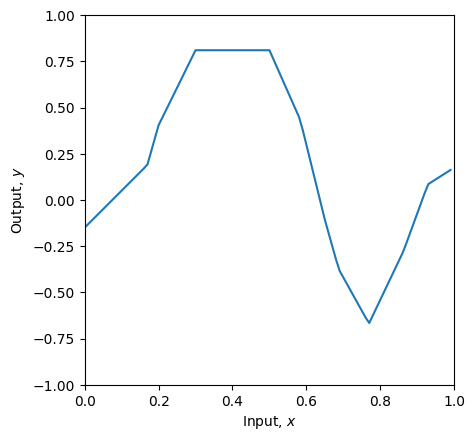

In [19]:
# Define parameters (note first dimension of theta and phi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi[3] = 2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

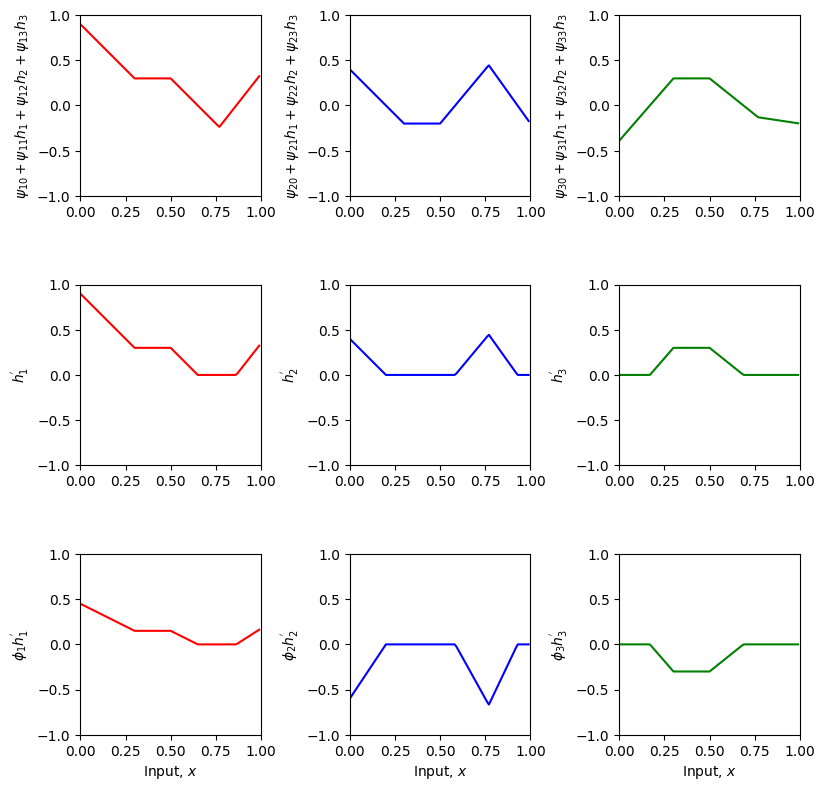

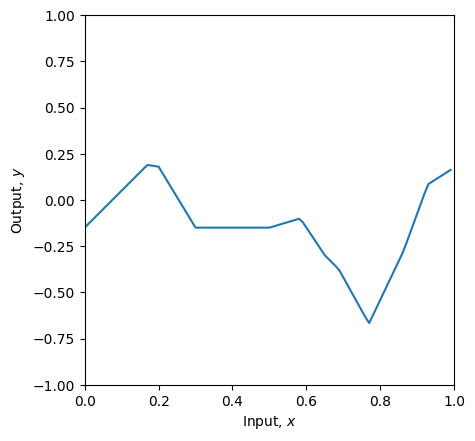

In [20]:
phi[3] = -1
# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

### Deep Neural Networks

In [21]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [22]:
# # Plot the shallow neural network.  We'll assume input in is range [-1,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y):
  fig, ax = plt.subplots()
  ax.plot(x.T,y.T)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  plt.show()

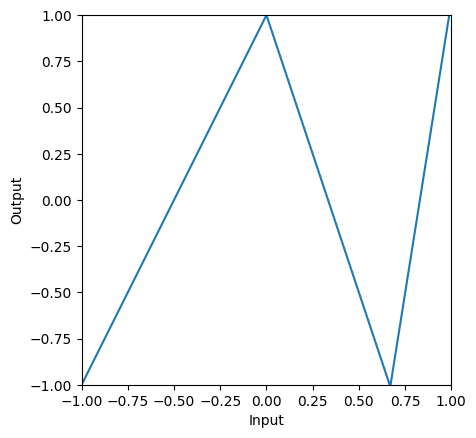

In [23]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1,1,0.01).reshape([1,-1])

# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out)

Now we'll define the same neural network, but this time, we will  use matrix form.  When you get this right, it will draw the same plot as above.

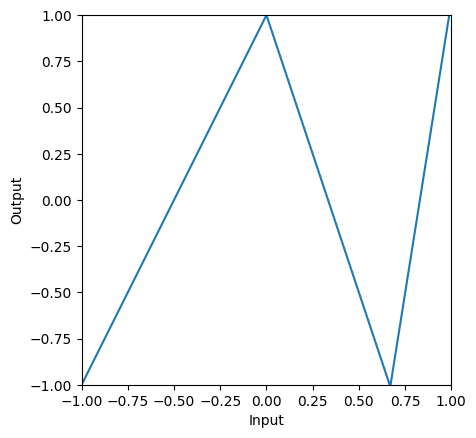

In [25]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((1,1))
Omega_1 = np.zeros((1,3))

# Fill in the values of the beta and Omega matrices with the n1_theta and n1_phi parameters that define the network above
# !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0]
beta_0[0,0] = n1_theta_10
beta_0[1,0] = n1_theta_20
beta_0[2,0] = n1_theta_30
Omega_0[0,0] = n1_theta_11
Omega_0[1,0] = n1_theta_21
Omega_0[2,0] = n1_theta_31

beta_1[0,0] = n1_phi_0
Omega_1[0, 0] = n1_phi_1
Omega_1[0, 1] = n1_phi_2
Omega_1[0, 2] = n1_phi_3
# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph
h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(Omega_0,n1_in_mat))
n1_out = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(Omega_1,h1)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)

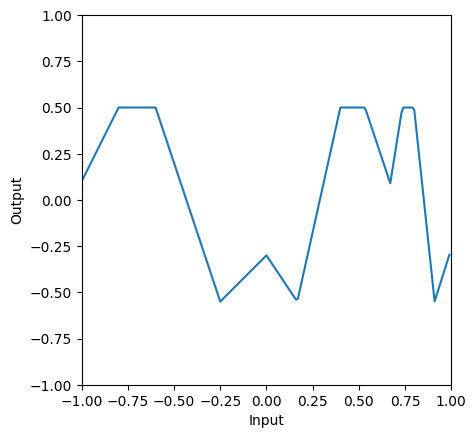

In [26]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1,1,0.01)

# We run the second neural network on the output of the first network
n2_out, *_ = \
    shallow_1_1_3(n1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n1_in, n2_out)

In [27]:
n1_in.size

200

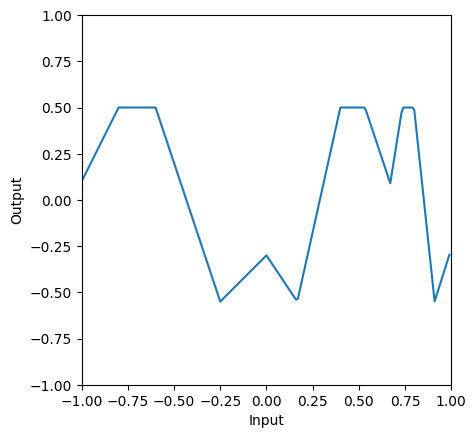

In [28]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((3,1))
Omega_1 = np.zeros((3,3))
beta_2 = np.zeros((1,1))
Omega_2 = np.zeros((1,3))

# Fill in the values of the beta and Omega matrices for the n1_theta, n1_phi, n2_theta, and n2_phi parameters
# that define the composition of the two networks above (see eqn 4.5 for Omega1 and beta1 albeit in different notation)
# !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0] SO EVERYTHING IS OFFSET
beta_0[0,0] = n1_theta_10
beta_0[1,0] = n1_theta_20
beta_0[2,0] = n1_theta_30
Omega_0[0,0] = n1_theta_11
Omega_0[1,0] = n1_theta_21
Omega_0[2,0] = n1_theta_31

beta_1[0,0] = n2_theta_10 + n2_theta_11 * n1_phi_0
beta_1[1,0] = n2_theta_20 + n2_theta_21 * n1_phi_0
beta_1[2,0] = n2_theta_30 + n2_theta_31 * n1_phi_0
Omega_1[0,0] = n2_theta_11 * n1_phi_1
Omega_1[0,1] = n2_theta_11 * n1_phi_2
Omega_1[0,2] = n2_theta_11 * n1_phi_3

Omega_1[1,0] = n2_theta_21 * n1_phi_1
Omega_1[1,1] = n2_theta_21 * n1_phi_2
Omega_1[1,2] = n2_theta_21 * n1_phi_3

Omega_1[2,0] = n2_theta_31 * n1_phi_1
Omega_1[2,1] = n2_theta_31 * n1_phi_2
Omega_1[2,2] = n2_theta_31 * n1_phi_3

beta_2[0,0] = n2_phi_0
Omega_2[0, 0] = n2_phi_1
Omega_2[0, 1] = n2_phi_2
Omega_2[0, 2] = n2_phi_3

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(Omega_0,n1_in_mat))
h2 = ReLU(np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(Omega_1,h1))
n1_out = np.matmul(beta_2,np.ones((1,n_data))) + np.matmul(Omega_2,h2)

# Draw the network and check that it looks the same as the non-matrix version
plot_neural(n1_in, n1_out)

Now let's make a deep network with 3 hidden layers. It will have  𝐷𝑖=4  inputs,  𝐷1=5  neurons in the first layer,  𝐷2=2  neurons in the second layer and  𝐷3=4  neurons in the third layer, and  𝐷𝑜=1  output. 

Consult figure 4.6 and equations 4.15 for guidance.

In [29]:
# define sizes
D_i=4; D_1=5; D_2=2; D_3=4; D_o=1
# We'll choose the inputs and parameters of this network randomly using np.random.normal
# For example, we'll set the input using
n_data = 4;
x = np.random.normal(size=(D_i, n_data))
x.shape

(4, 4)

In [32]:
# define sizes
D_i=4; D_1=5; D_2=2; D_3=4; D_o=1
# We'll choose the inputs and parameters of this network randomly using np.random.normal
# For example, we'll set the input using
n_data = 4;
x = np.random.normal(size=(D_i, n_data))
# initialize the parameters randomly with the correct sizes
# Replace the lines below
beta_0 = np.random.normal(size=(4,1))
Omega_0 = np.random.normal(size=(5,4))
beta_1 = np.random.normal(size=(5,1))
Omega_1 = np.random.normal(size=(2,5))
beta_2 = np.random.normal(size=(2,1))
Omega_2 = np.random.normal(size=(4,2))
beta_3 = np.random.normal(size=(4,1))
Omega_3 = np.random.normal(size=(1,4))


# If you set the parameters to the correct sizes, the following code will run
h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(Omega_0,x));
h2 = ReLU(np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(Omega_1,h1));
h3 = ReLU(np.matmul(beta_2,np.ones((1,n_data))) + np.matmul(Omega_2,h2));
y = np.matmul(beta_3,np.ones((1,n_data))) + np.matmul(Omega_3,h3)

if h1.shape[0] is not D_1 or h1.shape[1] is not n_data:
  print("h1 is wrong shape")
if h2.shape[0] is not D_2 or h1.shape[1] is not n_data:
  print("h2 is wrong shape")
if h3.shape[0] is not D_3 or h1.shape[1] is not n_data:
  print("h3 is wrong shape")
if y.shape[0] is not D_o or h1.shape[1] is not n_data:
  print("Output is wrong shape")

# Print the inputs and outputs
print("Input data points")
print(x)
print ("Output data points")
print(y)

ValueError: operands could not be broadcast together with shapes (4,4) (5,4) 